# Basic Models

## SVMs
- for classifiction and regression (SVCs, SVRs)
- can be applied on linear and non-linear data
- look for the best seperating line or decision boundary 
- look for the largest margin
### Commonly used kernels:
- linear
- polynomial
- radical basis function (RBF) - Gaussian RBF
- sigmoid
- etc.

### Stronger point
 - they are versatile
 - can build complex decision boundaries on low-dimensional data
 - can work well on high-dimensional data with relatively small sample data
### Alteratives
 - DT and Random Forest
### Good practices:
 - data scaling
 - other pre-processing
 - chossing an approriate kernel
 - tuning hyper-apra: C, gamma, etc.


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svm = SVC(gamma='auto') # can shift + tab to check other parameters to finetune the model
svm.fit(x_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(x_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(x_test, y_test)))

The accuracy on the training subset: 1.000
The accuracy on the test subset: 0.629


In [8]:
## about results shows that it is overfitting

In [9]:
type(cancer)  # tlooks not a Pandas Dataframe format

sklearn.utils.Bunch

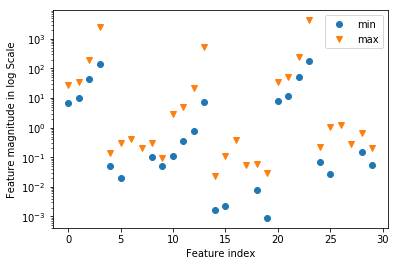

In [4]:
# finetune the scale for better results

plt.plot(x_train.min(axis = 0),'o', label = 'min')
plt.plot(x_train.max(axis = 0), 'v', label ='max')
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude in log Scale')
plt.yscale('log') # what does this mean - to check
plt.legend(loc = 'upper right')

In [12]:
# finetune with gamma parameter

svm_s = SVC(gamma='scale')

svm_s.fit(x_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm_s.score(x_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm_s.score(x_test, y_test)))

The accuracy on the training subset: 0.904
The accuracy on the test subset: 0.937


In [21]:
# finetune with C parameter, remember C is in capital

svm_c1000 = SVC(C=1000,gamma = 'scale')

svm_c1000.fit(x_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm_c1000.score(x_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm_c1000.score(x_test, y_test)))

The accuracy on the training subset: 0.958
The accuracy on the test subset: 0.951


# Uncertainty Esimation - decision function

In [26]:
print('the decision function is:\n\n{}'.format(svm_s.decision_function(x_test)[:20]))

the decision function is:

[ 0.27549261  1.17477047  1.05351991  0.49776805  1.47432821  1.43431027
  1.51618426  1.47797692  1.38755037  1.57199207  0.55567942  0.59648076
  1.54547877 -0.33403454  0.5831279  -0.78214212  1.4875985  -2.29368902
 -1.36159662 -2.24211669]


In [27]:
print('Threshold decision fnction:\n\n{}'.format(svm_s.decision_function(x_test)[:20]>0))

Threshold decision fnction:

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True False  True False False False]


In [24]:
svm.classes_

array([0, 1])

# Predicting probability

In [29]:
svm # default probablitity is False

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
svm = SVC(C=1000, probability = True, gamma = 'scale')
svm.fit(x_train, y_train)

print('Predicted probabiblities for the samples (magligant and bening):\n\n{}'.format(svm.predict_proba(x_test[:10])))

Predicted probabiblities for the samples (magligant and bening):

[[0.0070423  0.97885894 0.01409876]
 [0.94781933 0.03572811 0.01645256]
 [0.02017893 0.00413399 0.97568708]
 [0.00752856 0.92633241 0.06613903]
 [0.01030549 0.95251636 0.03717815]
 [0.95306332 0.03295413 0.01398255]
 [0.02290303 0.96591381 0.01118316]
 [0.01362822 0.04150043 0.94487135]
 [0.00923289 0.70868354 0.28208357]
 [0.01202994 0.98019778 0.00777228]]


In [60]:
svm.decision_function(x_test[:10])

array([[-0.09713911,  2.27601437,  0.82112474],
       [ 2.0803419 ,  1.4196581 , -0.5       ],
       [-0.0649289 ,  0.67959872,  2.38533019],
       [-0.09669322,  2.19336981,  0.90332341],
       [-0.0923627 ,  2.21882549,  0.87353721],
       [ 2.0833275 ,  1.33386409, -0.41719159],
       [-0.06289952,  2.29411657,  0.76878295],
       [-0.09363386,  0.88663687,  2.20699699],
       [-0.10411717,  2.11067368,  0.99344349],
       [-0.07748475,  2.31010805,  0.7673767 ]])

#### multi class

In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

iris = load_iris()

In [49]:
x_train, x_test, y_train,y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)

gbrt.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [54]:
gbrt.decision_function(x_test[:10]) # The decision function for the 3-class iris dataset

array([[-0.52931069,  1.46560359, -0.50448467],
       [ 1.51154215, -0.49561142, -0.50310736],
       [-0.52379401, -0.4676268 ,  1.51953786],
       [-0.52931069,  1.46560359, -0.50448467],
       [-0.53107259,  1.28190451,  0.21510024],
       [ 1.51154215, -0.49561142, -0.50310736],
       [-0.52931069,  1.46560359, -0.50448467],
       [-0.53043817, -0.4676268 ,  1.51953786],
       [-0.52931069,  1.46560359, -0.50448467],
       [-0.52931069,  1.46560359, -0.50448467]])

In [52]:
gbrt.predict_proba(x_test[:10]) # predict probability

array([[0.10664722, 0.7840248 , 0.10932798],
       [0.78880668, 0.10599243, 0.10520089],
       [0.10231173, 0.10822274, 0.78946553],
       [0.10664722, 0.7840248 , 0.10932798],
       [0.10825347, 0.66344934, 0.22829719],
       [0.78880668, 0.10599243, 0.10520089],
       [0.10664722, 0.7840248 , 0.10932798],
       [0.10170311, 0.10829611, 0.79000078],
       [0.10664722, 0.7840248 , 0.10932798],
       [0.10664722, 0.7840248 , 0.10932798]])

## Preprocessing Methods
- binarization
- scaling
- normalization
- mean removal
- etc

In [77]:
from sklearn import preprocessing as pr
import numpy as np

data = np.array([ 
    [2.2,5.9,-1.8], 
    [5.4,-3.2,-5.1], 
    [-1.9,4.2,1.5]  
    ]) 

#### 1. Binarization

In [80]:
bindata = pr.Binarizer(threshold=1.5).transform(data)
bindata

array([[1., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

#### 2. Mean Removal

In [87]:
print(data.mean(axis=0))

[ 1.9  2.3 -1.8]


In [86]:
print(data.std(axis=0))

[2.98775278 3.95052739 2.69443872]


In [83]:
data_scaled = pr.scale(data) # data will be scaled

In [85]:
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[0. 0. 0.]
[1. 1. 1.]


#### 3. Scaling
- StandardScaler >> features with a mean = 0 and variance =1
- MinMaxScaler >> features in a 0 to 1 range
- Normalizer >> feature vector to a Euclidean length = 1

In [89]:
data 

array([[ 2.2,  5.9, -1.8],
       [ 5.4, -3.2, -5.1],
       [-1.9,  4.2,  1.5]])

In [90]:
minmax_scaler = pr.MinMaxScaler(feature_range=(0,1))
data_minmax = minmax_scaler.fit_transform(data)

data_minmax

array([[0.56164384, 1.        , 0.5       ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.81318681, 1.        ]])